# FRETBursts Paper Main Notebook

*This the **main notebook** for reproducing code examples and figures for the paper:*

<br>
<div class="alert alert-success">
<b>FRETBursts: Open Source Burst Analysis Toolkit for Confocal Single-Molecule FRET</b><br>
Ingargiola et al. (2016). biorXiv doi:<a href="http://dx.doi.org/10.1101/039198" target="_blank">10.1101/039198</a>
</div>

# 0. Initializations

## Loading the software

Load software and define default figure style.

In [1]:
from fretbursts import *
import phconvert as phc
print('phconvert: ', phc.__version__)

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.5.5).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1101/039198 

--------------------------------------------------------------
phconvert:  0.6.9


In [2]:
sns = init_notebook(fs=13, savefig_dpi=75)

In [3]:
figure_size = (5, 4)
default_figure = lambda: plt.subplots(figsize=figure_size)
save_figures = True

def savefig(filename, **kwargs):
    if not save_figures:
        return
    import os
    name, extension = os.path.splitext(os.path.basename(filename))
    dir_ = '../figures/%s/' % name
    kwargs_ = dict(dpi=150, bbox_inches='tight', 
                   frameon=True, facecolor='white', transparent=False)
    kwargs_.update(kwargs)
    plt.savefig(dir_ + name + extension, **kwargs_)

## Getting the data

Download the two data files used in this notebook:

In [4]:
url = 'http://files.figshare.com/4917442/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5'
download_file(url, save_dir='./data')

URL:  http://files.figshare.com/4917442/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5
File: 0023uLRpitc_NTP_20dT_0.5GndCl.hdf5
 
File already on disk: /Users/anto/src/fretbursts_paper/notebooks/data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5 
Delete it to re-download.


In [5]:
filename = './data/' + url.split('/')[-1]
filename

'./data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5'

In [6]:
url2 = 'http://files.figshare.com/4861018/004_dsDNA_17d_green100u_red40u.hdf5'
download_file(url2, save_dir='./data')

URL:  http://files.figshare.com/4861018/004_dsDNA_17d_green100u_red40u.hdf5
File: 004_dsDNA_17d_green100u_red40u.hdf5
 
File already on disk: /Users/anto/src/fretbursts_paper/notebooks/data/004_dsDNA_17d_green100u_red40u.hdf5 
Delete it to re-download.


In [7]:
filename2 = './data/' + url2.split('/')[-1]
filename2

'./data/004_dsDNA_17d_green100u_red40u.hdf5'

# Section 1. Introduction

No code for this section.

# Section 2. FRETBursts Overview

No code for this section.

# Section 3. Architecture and Concepts

## 3.1 Photon Streams

No code of figures in this section.

## 3.2 Background Definitions

To reproduce **Fig. 2 & 3** see the notebook:

- [Figures - Background plots](Figures - Background plots.ipynb)

## 3.3 The Data Class

No code for this section.

## 3.4 Introduction to Burst Search

No code for this section.

## 3.5 γ-corrected Burst Sizes and Weights

No code for this section.

## 3.6 Plotting Data

This section of the paper describes the general syntax for plotting in FRETBursts.
For practical reasons (i.e. we need to load the data first),
these plot examples are reproduced later in this notebook.

To avoid errors, it is recommended 
to run the notebook sequentially, without jumping section.

# Section 4. smFRET Burst Analysis

## 4.1 Loading the Data

Here we load 2 μs-ALEX smFRET data files. For the second one we also apply the alternation parameters:

In [8]:
d = loader.photon_hdf5(filename)

In [9]:
d2 = loader.photon_hdf5(filename2)
#d2.add(D_ON=(2100, 3900), A_ON=(100, 1900))
#bpl.plot_alternation_hist(d)
loader.usalex_apply_period(d2)

#donor: 764963  #acceptor: 1717128 



data_004_dsDNA_17d_green100u_red40u G1.000

Since the files are in Photon-HDF5 format, they contain a sample description. Let's print it:

In [10]:
d.sample

{'buffer_name': 'TE50 + 0.5M GndCl',
 'dye_names': 'Cy3B, ATTO647N',
 'num_dyes': 2,
 'sample_name': 'Partially hybridized 20dT DNA oligo doubly labeled with Cy3B and Atto647N'}

In [11]:
d2.sample

{'buffer_name': 'TE50',
 'dye_names': 'ATTO550, ATTO647N',
 'num_dyes': 2,
 'sample_name': 'Doubly-labeled 40-bp dsDNA, D-A separation 17 base-pairs.'}

## 4.2 Alternation Parameters

In [12]:
d.add(D_ON=(2100, 3900), A_ON=(100, 1900))

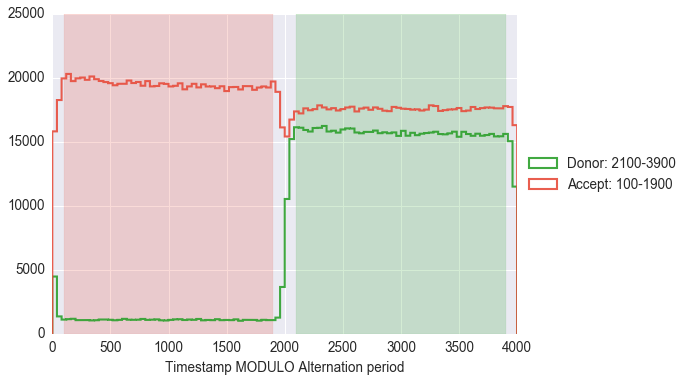

In [13]:
bpl.plot_alternation_hist(d)

In [14]:
loader.usalex_apply_period(d)

#donor: 759244  #acceptor: 1671257 



data_0023uLRpitc_NTP_20dT_0.5GndCl G1.000

For reproducing the alternation figure (**Fig. 1**) see the notebook:

- [Figures - ALEX histograms](Figures - ALEX histograms.ipynb)

For additional information, see the *μs-ALEX parameters* section in FRETBursts notebook:

- [FRETBursts - us-ALEX smFRET burst analysis](http://nbviewer.ipython.org/urls/raw.github.com/tritemio/FRETBursts_notebooks/master/notebooks/FRETBursts%2520-%2520us-ALEX%2520smFRET%2520burst%2520analysis.ipynb)

## Plot examples from section 3.6

In this sections there are some examples on how to make plot with FRETBursts.

To plot a timetrace of the measurement we use:

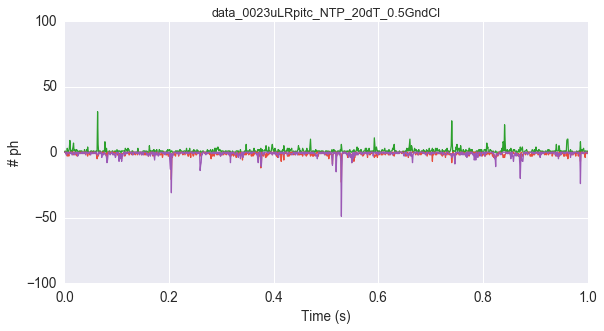

In [15]:
dplot(d, timetrace);

Here, `dplot` is a generic wrapper (the same for all plots)
that takes care of setting up the figure, title and axis 
(in the multispot case `dplot` creates multi-panel plot).
The second argument, `timetrace`, is the actual plot function. 
All the eventual additional arguments passed to `dplot` are, 
in turn, passed to the plot function (e.g. `timetrace`).

If we look at the documentation for [`timetrace`](http://fretbursts.readthedocs.org/en/latest/plots.html#fretbursts.burst_plot.timetrace)
function we notice that it accepts a long list of arguments.
In python, when an argument is not specified, it will take the default
value specified in the function definition (see previus link).

As an example, to change the bin size (i.e. duration) of the timetrace histogram,
we can look up in the [`timetrace` documentation](http://fretbursts.readthedocs.org/en/latest/plots.html#fretbursts.burst_plot.timetrace)
and find that the argument we need to modify is `binwidth`
(we can also see that the default value is `0.001` seconds).
We can then re-plot the timetrace using a bin of 0.5 ms:

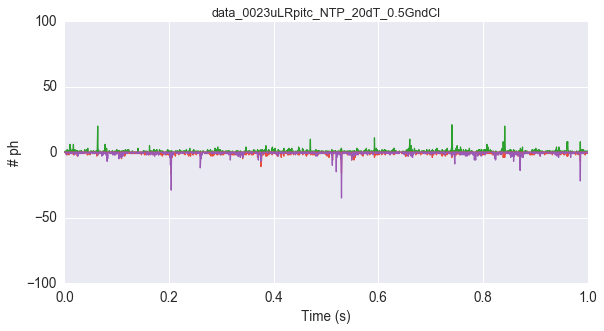

In [16]:
dplot(d, timetrace, binwidth=0.5e-3);

> ### See also:
>
> - [bpl.timetrace](http://fretbursts.readthedocs.org/en/latest/plots.html#fretbursts.burst_plot.timetrace)
>    function documentation
> - [bpl.ratetrace](http://fretbursts.readthedocs.org/en/latest/plots.html#fretbursts.burst_plot.ratetrace)
>   function documentation
> - [Plotting basics](http://nbviewer.jupyter.org/github/tritemio/FRETBursts_notebooks/blob/master/notebooks/FRETBursts%20-%20us-ALEX%20smFRET%20burst%20analysis.ipynb#Plotting-basics) in FRETBursts us-ALEX tutorial.

## 4.3 Background Estimation

Background estimation using a threshold of 2ms and a background period of 30s:

In [17]:
d.calc_bg(bg.exp_fit, time_s=30, tail_min_us=2000)

 - Calculating BG rates ... [DONE]


Background estimation automatic threshold and a background period of 20s:

In [18]:
d.calc_bg(bg.exp_fit, time_s=20, tail_min_us='auto', F_bg=1.7)

 - Calculating BG rates ... [DONE]


> For more info see [Background estimation](http://nbviewer.jupyter.org/github/tritemio/FRETBursts_notebooks/blob/master/notebooks/FRETBursts%20-%20us-ALEX%20smFRET%20burst%20analysis.ipynb#Background-estimation) section in the us-ALEX tutorial.

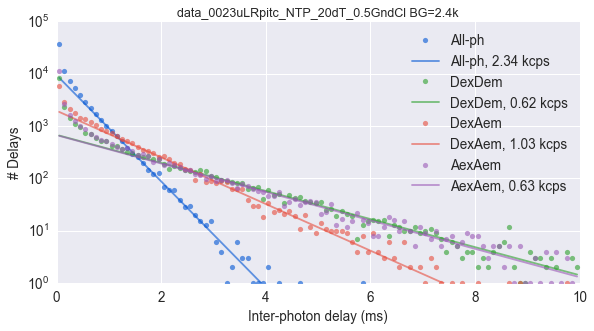

In [19]:
dplot(d, hist_bg, period=0);

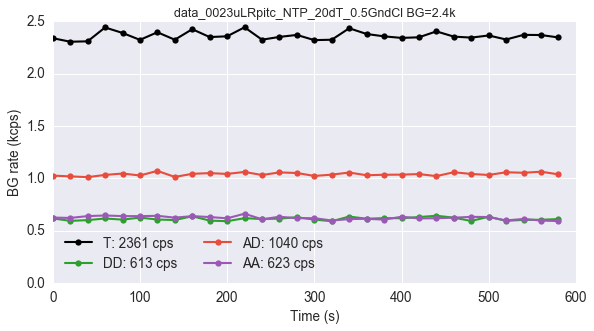

In [20]:
dplot(d, timetrace_bg);

 - Calculating BG rates ... [DONE]


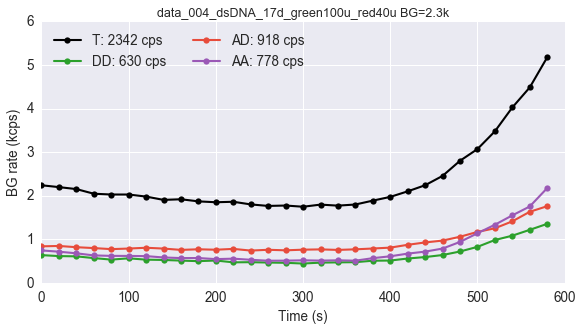

In [21]:
d2.calc_bg(bg.exp_fit, time_s=20, tail_min_us='auto', F_bg=1.7)
dplot(d2, timetrace_bg);

## 4.4 Burst Search

### 4.4.1 Burst Search in FRETBursts

This is a sliding-window burst search using all-photons stream,
m=10 photons to compute the rate, and a threshold for burst
start 6 times larger (`F`) than the local background rate:

In [22]:
d.burst_search(F=6, m=10, ph_sel=Ph_sel('all'))

 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


In the next example, we fix the burst search rate threshold to a constant value of 50kcps:

In [23]:
d.burst_search(min_rate_cps=50e3, m=10, ph_sel=Ph_sel('all'))

 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


Here, we perform a dual-channel burst search (DCBS):

In [24]:
d_dcbs = bext.burst_search_and_gate(d, F=6, m=10)

Deep copy executed.
Deep copy executed.
Deep copy executed.
 - Performing burst search (verbose=False) ... - Recomputing background limits for Dex ... [DONE]
 - Recomputing background limits for all ... [DONE]
 - Fixing  burst data to refer to ph_times_m ... [DONE]
[DONE]
 - Calculating burst periods ...[DONE]
 - Performing burst search (verbose=False) ... - Recomputing background limits for AexAem ... [DONE]
 - Recomputing background limits for all ... [DONE]
 - Fixing  burst data to refer to ph_times_m ... [DONE]
[DONE]
 - Calculating burst periods ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


> ### Related documentation:
>
> - [Data.burst_search](http://fretbursts.readthedocs.org/en/latest/data_class.html?highlight=burst_search#fretbursts.burstlib.Data.burst_search)
> - [bext.burst_search_and_gate](http://fretbursts.readthedocs.org/en/latest/plugins.html?highlight=burst_search_and_gate#fretbursts.burstlib_ext.burst_search_and_gate)

Here, we re-perform the initial burst search:

In [25]:
d.burst_search(F=6, m=10, ph_sel=Ph_sel('all'))

 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


### 4.4.2 Correction Coefficients

At any time during the analysis, setting the correction coefficients 
will automatically correct and update all the burst data:

In [26]:
d.gamma = 0.85
d.leakage = 0.15
d.dir_ex = 0.08

   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.


## 4.5 Burst Selection

Select bursts with at least 30 photons in Dex stream:

In [27]:
ds = d.select_bursts(select_bursts.size, th1=30)

Select bursts with *E* in the range $[0, 0.5]$ range and *S* in the range $[0.2, 0.8]$:

In [28]:
ds = d.select_bursts(select_bursts.ES, E1=0, E2=0.5, S1=0.2, S2=0.8)

Select bursts with duration between 0.5 and 2 milliseconds:

In [29]:
ds = d.select_bursts(select_bursts.width, th1=0.5, th2=2)

Example of burst selection combining two criteria (burst size and duration):

In [30]:
ds = d.select_bursts(select_bursts.size, th1=50, th2=200)
dsw = ds.select_bursts(select_bursts.width, th1=0.5e-3, th2=3e-3)

### 4.5.1 Burst Size Selection

Select bursts with size of at least 30, counting both Dex and Aex photons:

In [31]:
ds = d.select_bursts(select_bursts.size, th1=30, add_naa=True)

Select bursts with size of at least 15 using only Dex photons. 
The size is computed as:

$$ n_t = \gamma n_d + n_a $$

In [32]:
ds = d.select_bursts(select_bursts.size, th1=15, gamma=0.65)

Finally, to get the arry of burst sizes (optionally adding `naa`) and applying
corrections we use

In [33]:
ds.burst_sizes()

array([[ 30.58760797,  18.93619238,  20.85397783, ...,  24.70005745,
         19.63811229,  18.40923355]])

> ### Related documentation:
>
> - [select_bursts.size](http://fretbursts.readthedocs.org/en/latest/burst_selection.html#fretbursts.select_bursts.size)
> - [Data.burst_sizes](http://fretbursts.readthedocs.org/en/latest/data_class.html#fretbursts.burstlib.Data.burst_sizes)
> - [Data.burst_sizes_ich](http://fretbursts.readthedocs.org/en/latest/data_class.html#fretbursts.burstlib.Data.burst_sizes_ich)

### 4.5.2 Select the FRET Populations

A convenient way to select the FRET populuation is applying two filters.
The first, selecting bursts sizes (using Dex photons) larger than a threshold.
The second, selection bursts with `naa` (counts in the AexAem stream)
larger than a threshold:

In [34]:
ds1 = d.select_bursts(select_bursts.size, th1=15)
ds2 = ds1.select_bursts(select_bursts.naa, th1=15)

In [35]:
dds1 = d_dcbs.select_bursts(select_bursts.size, th1=15)
dds2 = dds1.select_bursts(select_bursts.naa, th1=15)

The result of this filter (`ds2`) can be compared with a
single burst size filter using all-photons (`ds`) in the plots below:

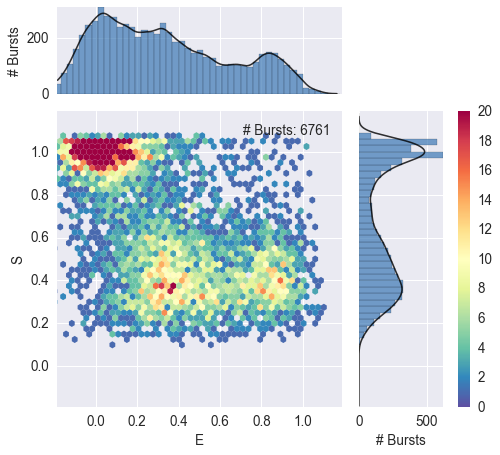

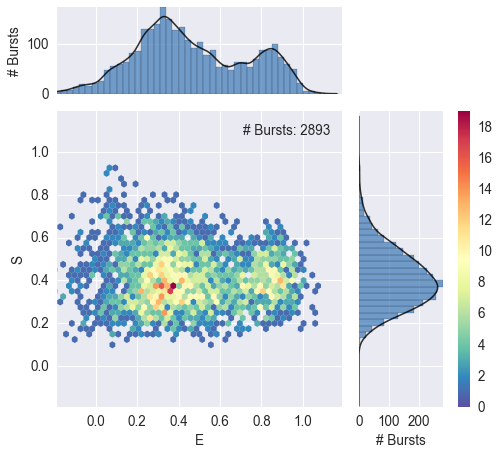

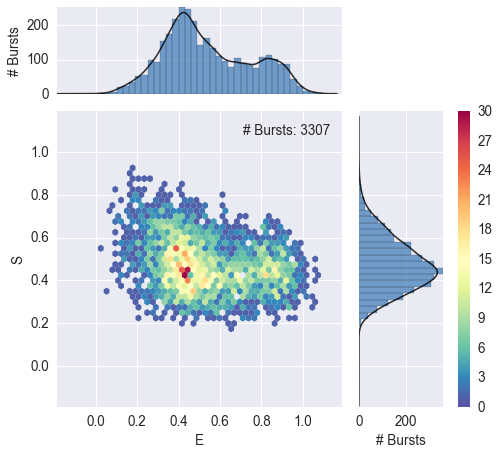

In [36]:
alex_jointplot(ds)
alex_jointplot(ds2);
alex_jointplot(dds2);

We can do the same selection with the other measurement (in the variable `d2`)
which contains a single FRET peak:

In [37]:
d2.burst_search()

 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


In [38]:
d2s = d2.select_bursts(select_bursts.size, add_naa=True, th1=30)
d2s1 = d2.select_bursts(select_bursts.size, th1=15)
d2s2 = d2s1.select_bursts(select_bursts.naa, th1=15)

And plot the figures 4 & 5 used in the paper:

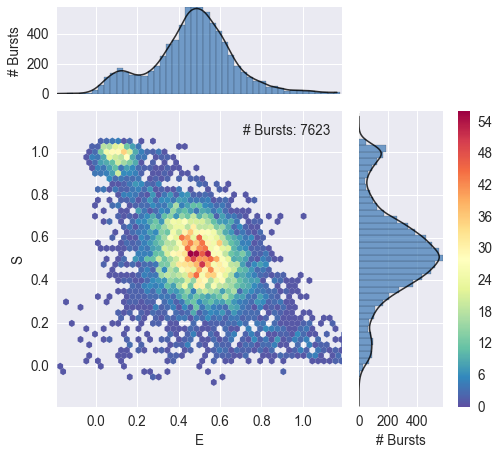

In [39]:
alex_jointplot(d2s)
savefig('alex_jointplot')

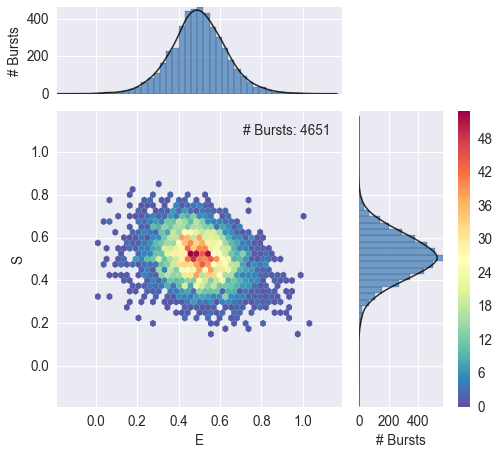

In [40]:
alex_jointplot(d2s2)
savefig('alex_jointplot_fretsel')

## 4.6 Population Analysis

In [41]:
bext.bursts_fitter(ds2, 'E', binwidth=0.03,
                   model=mfit.factory_two_gaussians());

In [42]:
fit_res = ds2.E_fitter.fit_res[0]
print(fit_res.fit_report())

[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # function evals   = 80
    # data points      = 46
    # variables        = 6
    chi-square         = 0.596
    reduced chi-square = 0.015
    Akaike info crit   = -181.519
    Bayesian info crit = -170.548
[[Variables]]
    p1_amplitude:   0.75389685 +/- 0.023534 (3.12%) (init= 1)
    p1_sigma:       0.18069744 +/- 0.006923 (3.83%) (init= 0.03)
    p1_center:      0.34718894 +/- 0.006276 (1.81%) (init= 0.1)
    p2_amplitude:   0.24509267 +/- 0.017972 (7.33%) (init= 1)
    p2_sigma:       0.09539659 +/- 0.007598 (7.97%) (init= 0.03)
    p2_center:      0.83897968 +/- 0.007507 (0.89%) (init= 0.9)
    p1_fwhm:        0.42550994 +/- 0.016302 (3.83%)  == '2.3548200*p1_sigma'
    p1_height:      1.66444716 +/- 0.047111 (2.83%)  == '0.3989423*p1_amplitude/p1_sigma'
    p2_fwhm:        0.22464181 +/- 0.017893 (7.97%)  == '2.3548200*p2_sigma'
    p2_height:      1.02496146 +/- 0.063202 (6.17%

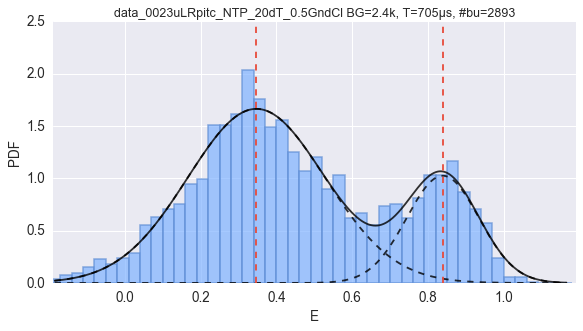

In [43]:
dplot(ds2, hist_fret, show_model=True);

The reduced $\chi^2$ can be obtained as follows:

In [44]:
ds2.E_fitter.fit_res[0].redchi

0.014891785080295367

Finally, to reproduce **Fig. 6**, we replot the previous histogram tweaking the style:

In [45]:
dds1 = d_dcbs.select_bursts(select_bursts.size, th1=30)
dds2 = dds1.select_bursts(select_bursts.naa, th1=15)

In [46]:
bext.bursts_fitter(dds2, 'E', binwidth=0.03,
                   model=mfit.factory_two_gaussians());

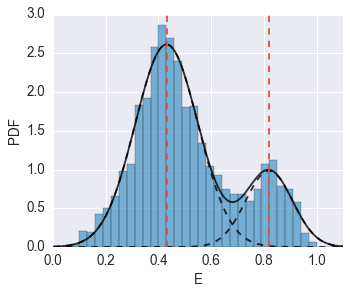

In [47]:
fig, ax = default_figure()

cmap = 'Blues' #'Spectral_r'
c = sns.color_palette(cmap, 12)[-5]

dplot(dds2, hist_fret, show_model=True, ax=ax, 
      hist_bar_style=dict(facecolor=c, edgecolor='k', linewidth=0.3))
ax.set_title('')
ax.set_xlim(0, 1.1)
savefig('hist_fit')

# 5 Implementing Burst Variance Analysis

For this section of the paper see the dedicated notebook:

- [Figures - Burst Variance Analysis](Figures - Burst Variance Analysis.ipynb)